# **Homework on Credit Risk**
## **Building an Application Scoring Model**

### **General Information**
- **Date assigned:** December 2, 2025  
- **Soft deadline:** 23:59 MSK, December 15, 2025  
- **Hard deadline:** 23:59 MSK, December 18, 2025  
- **Submission:** send your work to  
  \texttt{maria.vorobyova.ser@gmail.com}  
  with the subject format:
  \[
  \text{HSE\_CS\_[track]\_FullName}
  \]
  Example:
  \[
  \text{HSE\_CS\_PAD\_IVANOV\_IVAN\_IVANOVICH}
  \]

---

### **Grading and Penalties**
Maximum score: **10 points**

Late penalty:
\[
\text{Final Score} = 10 - \text{days late}
\]

Submission **after** the hard deadline is **not accepted**.

Work must be completed **independently**.  
Similar solutions → **plagiarism** → score **0**.

---

### **Score Reduction If**
- no comments in the notebook
- unclear or poorly written code
- incorrect analysis and conclusions

---

### **Task**
Build a scoring model estimating the **probability of default** at the **credit application stage**.

Follow the provided notebook strictly and complete every block.

---

### **Dataset**
Based on Kaggle competition:
\[
\text{Give Me Some Credit}
\]

Data source:  
https://www.kaggle.com/competitions/GiveMeSomeCredit/data  

Data description:  
**Data Dictionary.xlsx**



# **Work assignment:**
**1.Explatory Data Analysis - (Task weight: 20%)**

**2.Creating additional variables - (Task weight: 10%)**

**3. Model building (A logistic regression must be built on the WoE variables.)- (Task weight: 50%)**

**4. Using methods to reduce class imbalance - (Task weight: 20%)**

# **Submitting results:**

* Submit homework via the Yandex form as a link to your GitHub, where all files and code (Python) will be.
* GitHub must be open and the code must be working, without errors.
* Name the repository using the template (HW_4_2025-FirstName_LastName).
* Link to the Yandex form: https://forms.yandex.ru/u/68eece24505690c23425594c

We wish you good luck!✌

# Additional explanations for the task

In [1]:
from google.colab import drive
import json
import zipfile

import pandas as pd

In [2]:
def load_dataset(from_kaggle:bool = False) -> pd.DataFrame:
  '''
  The function downloads data from the Kaggle website if from_kaggle=True is set.
Otherwise, the archive is read from a Google Drive link (this method is convenient for those who don't have access to Kaggle).
  params:
      - from_kaggle - индикатор откуда скачивать данные (True - c сайта kaggle, False -  c google диска)
  return:
      - pd.DataFrame

  '''
  if from_kaggle:
    # запросит разрешение к гугл диску, необходимо дать это разрешение
    drive.mount('/content/drive')
    # установим kaggle
    !pip install kaggle -q
    !mkdir ~/.kaggle
    # копируем kaggle.json (предварительно, необходимо сгенерить токен на
    # сайте kaggle и сохранить к себе на гугл диск) в папку ~/.kaggle/
    !cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
    !kaggle competitions download -c GiveMeSomeCredit
  else:
    !gdown 1MRYG6P6ScMTzTmXJlWdPdYQVNi04wLSm
  # распаковка архива
  zip_ref = zipfile.ZipFile('GiveMeSomeCredit.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()
  df_train = pd.read_csv('cs-training.csv')
  df_test = pd.read_csv('cs-test.csv')
  return df_train, df_test

In [3]:
df_train, df_test = load_dataset(from_kaggle=True)

Mounted at /content/drive
  0% 0.00/5.16M [00:00<?, ?B/s]
100% 5.16M/5.16M [00:00<00:00, 1.66GB/s]


In [4]:
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# 1.Explatory Data Analysis. Максимально - (20%-2 балла)

- 0 points if the task is not completed
- 1 point if statistics are calculated and there are logical graphs (important, USEFUL graphs), but no conclusions are drawn
- 2 points if statistics are calculated and there are graphs (important, USEFUL graphs) and CONCLUSIONS are drawn (important, that the conclusions are correct)

In [5]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

target_col = "SeriousDlqin2yrs"

print("train shape:", df_train.shape)
print("test shape:", df_test.shape)


train shape: (150000, 12)
test shape: (101503, 12)



Target distribution:


,count
SeriousDlqin2yrs,
0,139974
1,10026


,proportion
SeriousDlqin2yrs,
0,0.93316
1,0.06684


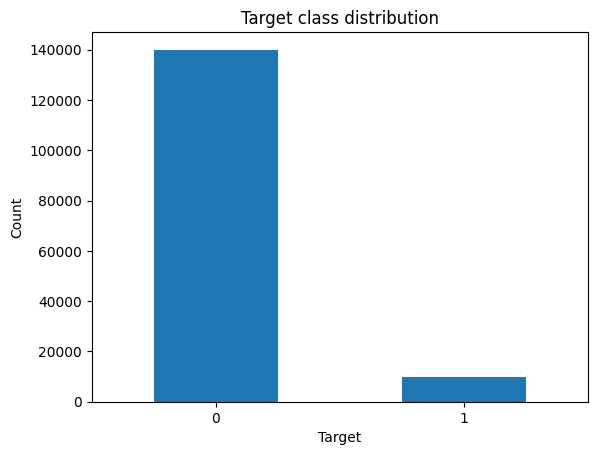

In [6]:
print("\nTarget distribution:")
display(df_train[target_col].value_counts(dropna=False))
display(df_train[target_col].value_counts(normalize=True))

df_train[target_col].value_counts().plot(
    kind="bar",
    title="Target class distribution",
    rot=0
)
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


In [7]:
def columnValues(df):
    row = [df.nunique(), (df.astype(str) == '0').sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df_train:
    data.append([column] + columnValues(df_train[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                               |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------------------+----------------+---------------+--------------+-------------+-------------|
| Unnamed: 0                           |         150000 |             0 |            0 |         0   | int64       |
| SeriousDlqin2yrs                     |              2 |        139974 |            0 |         0   | int64       |
| RevolvingUtilizationOfUnsecuredLines |         125728 |             0 |            0 |         0   | float64     |
| age                                  |             86 |             1 |            0 |         0   | int64       |
| NumberOfTime30-59DaysPastDueNotWorse |             16 |        126018 |            0 |         0   | int64       |
| DebtRatio                            |         114194 |             0 |            0 |         0   | float64     |
| MonthlyIncome                        |          13594 |       

In [8]:
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
display(df_train[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [9]:
corr = df_train[num_cols].corr(numeric_only=True)[target_col].sort_values(ascending=False)
print("\nCorrelation with target:")
display(corr)


Correlation with target:


,SeriousDlqin2yrs
SeriousDlqin2yrs,1.000000
NumberOfTime30-59DaysPastDueNotWorse,0.125587
NumberOfTimes90DaysLate,0.117175
NumberOfTime60-89DaysPastDueNotWorse,0.102261
NumberOfDependents,0.046048
Unnamed: 0,0.002801
RevolvingUtilizationOfUnsecuredLines,-0.001802
NumberRealEstateLoansOrLines,-0.007038
DebtRatio,-0.007602
MonthlyIncome,-0.019746


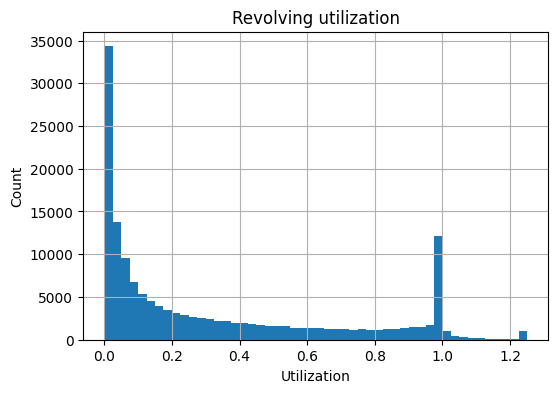

In [10]:
plt.figure(figsize=(6,4))
df_train["RevolvingUtilizationOfUnsecuredLines"].clip(0, 1.25).hist(bins=50)
plt.title("Revolving utilization")
plt.xlabel("Utilization")
plt.ylabel("Count")
plt.show()


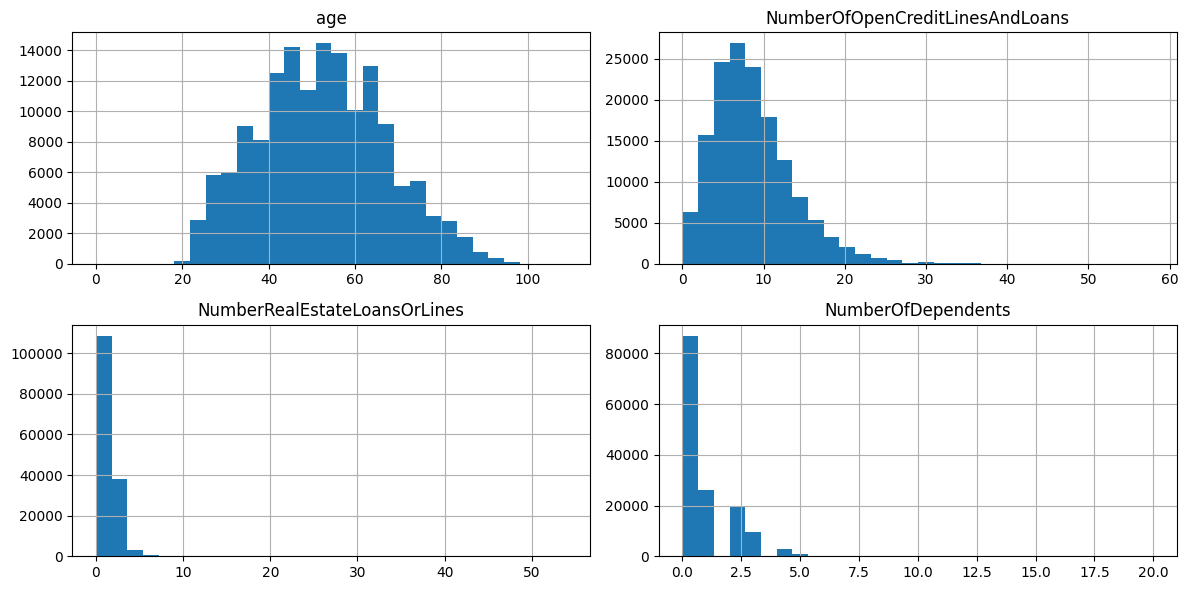

In [11]:
cols_to_plot = ['age', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']
df_train[cols_to_plot].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

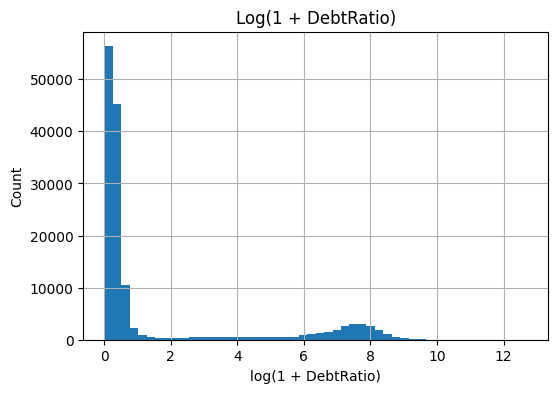

In [12]:
plt.figure(figsize=(6,4))
df_train["DebtRatio"].replace(0, np.nan).dropna().apply(np.log1p).hist(bins=50)
plt.title("Log(1 + DebtRatio)")
plt.xlabel("log(1 + DebtRatio)")
plt.ylabel("Count")
plt.show()


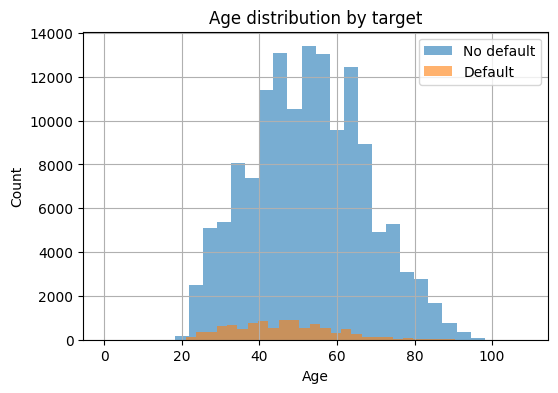

In [13]:
plt.figure(figsize=(6,4))
df_train[df_train[target_col]==0]["age"].hist(bins=30, alpha=0.6, label="No default")
df_train[df_train[target_col]==1]["age"].hist(bins=30, alpha=0.6, label="Default")
plt.legend()
plt.title("Age distribution by target")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


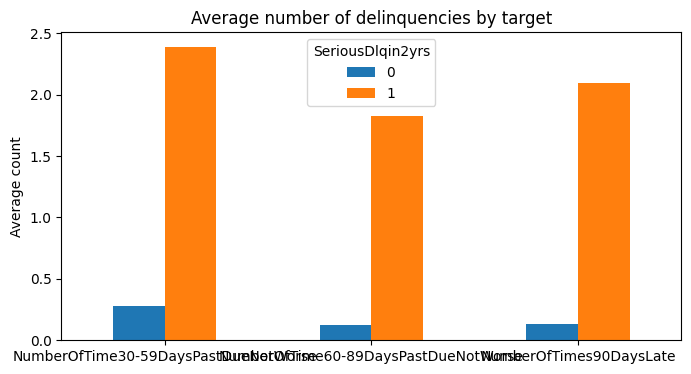

In [14]:
delinq_cols = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate"
]

means = df_train.groupby(target_col)[delinq_cols].mean().T

means.plot(kind="bar", figsize=(8,4))
plt.title("Average number of delinquencies by target")
plt.ylabel("Average count")
plt.xticks(rotation=0)
plt.show()


The target variable is highly imbalanced with defaults representing a small fraction of observations.
Age and delinquency-related features show clear differences between default and non-default customers.
Several variables (RevolvingUtilizationOfUnsecuredLines, DebtRatio) exhibit extreme values and heavy-tailed distributions, indicating the need for clipping or transformation.
Delinquency counts are strongly associated with default risk, which is also confirmed by correlation analysis.

# 2.Creating additional variables - (Task weight: 10%)

Be creative: the more variables, the higher the score! However, variables must be logical; illogical variables will not be accepted.

- 0 points if the task is not completed.
- 0.5 points - 2 additional variables created.
- 1 point - more than 3 variables created.


In [15]:
target_col = "SeriousDlqin2yrs"

df_train_fe = df_train.copy()
df_test_fe  = df_test.copy()

both = [df_train_fe, df_test_fe]

for d in both:
    d["debt_to_income"] = d["DebtRatio"] / (d["MonthlyIncome"].replace(0, np.nan))

    delin_cols = [c for c in ["NumberOfTime30-59DaysPastDueNotWorse",
                              "NumberOfTime60-89DaysPastDueNotWorse",
                              "NumberOfTimes90DaysLate"]]
    d["total_delinquencies"] = d[delin_cols].sum(axis=1)

    d["revol_util_clip"] = d["RevolvingUtilizationOfUnsecuredLines"].clip(0, 1)

    d["has_dependents"] = (d["NumberOfDependents"].fillna(0) > 0).astype(int)

    d["age_bin"] = pd.cut(d["age"], bins=[0, 25, 35, 45, 55, 65, 120], right=True)

print("Columns created:", sorted(set(df_train_fe.columns) - set(df_train.columns)))


Columns created: ['age_bin', 'debt_to_income', 'has_dependents', 'revol_util_clip', 'total_delinquencies']


# 3. Model building - (Task weight: 50%)
A logistic regression must be built on the WoE variables.

- If any other model is built, the score is 0.

In [25]:
# Remember to split the data into test and train
from sklearn.model_selection import train_test_split

y = df_train_fe[target_col].astype(int)

X = df_train_fe.drop(columns=[target_col])

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train mean:", y_train.mean(), "y_valid mean:", y_valid.mean())


X_train: (112500, 16) X_valid: (37500, 16)
y_train mean: 0.06684444444444444 y_valid mean: 0.06682666666666667


A WoE transformation must be calculated - maximum 3 points.

The WoE calculation must be done in two steps:

Step 1. Fine Classification (1 point). Splitting into a large number of bins (intervals).
- Typically, interval variables are divided into 20, 30, and so on intervals.
- For categorical variables, one category per group.
- Next, calculate the WoE for each group.

Step 2. Coarse Classification (2 points). Consolidating the intervals obtained in Step 1. The result should be no more than 5-10 intervals.
- Typically, groups with similar WoE values ​​are combined.
- The WoE must be monotonic, meaning that after your combination, the result must be interpretable (it is necessary to graphically demonstrate that the WoE is monotonic).


/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


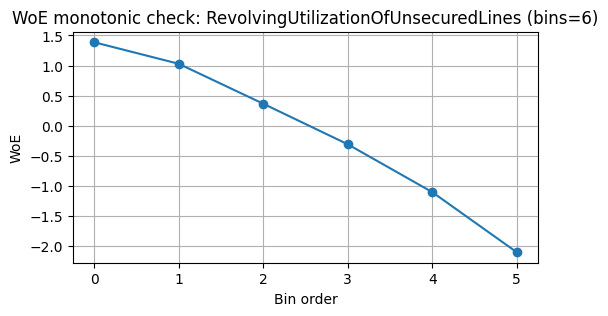

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


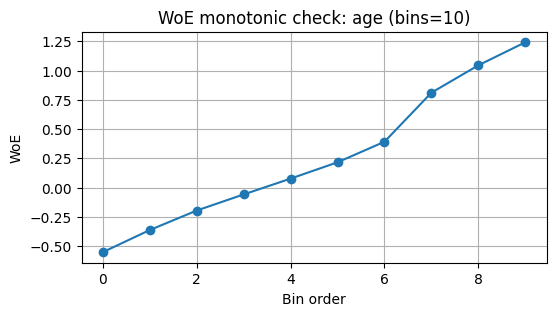

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


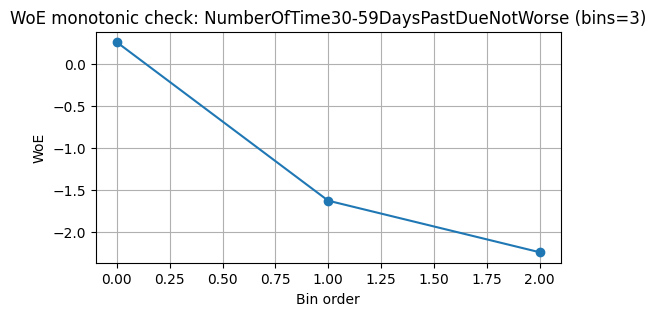

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


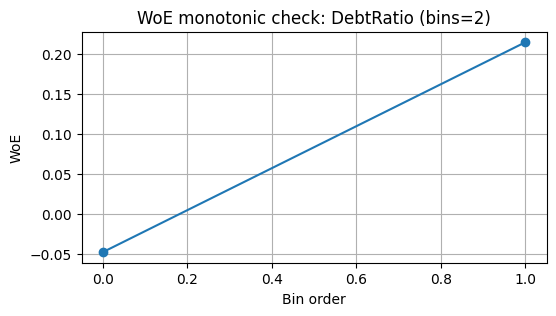

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


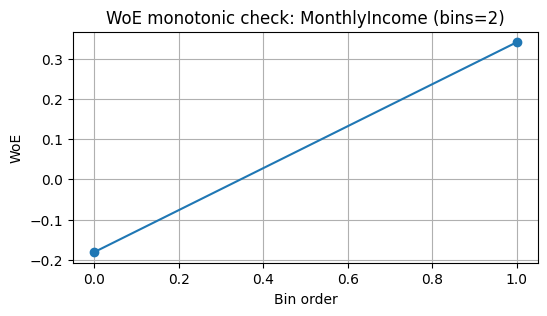

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


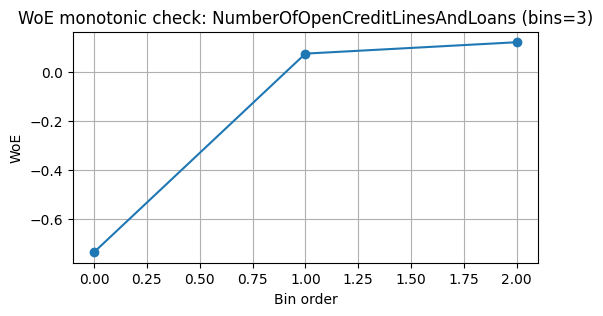

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


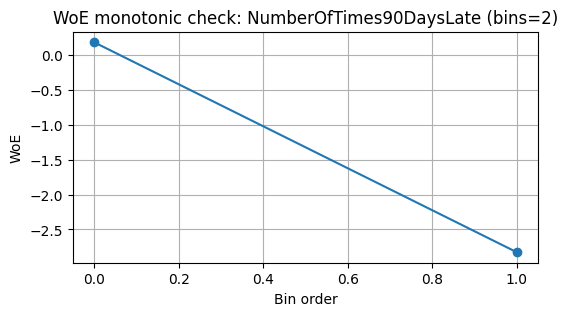

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


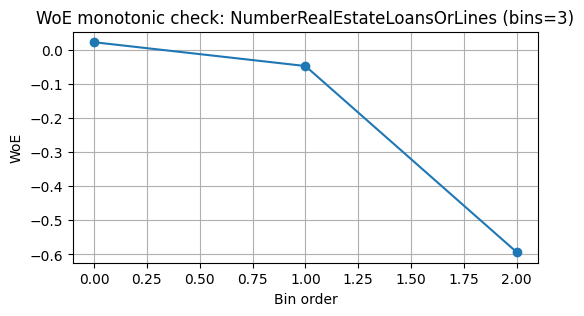

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


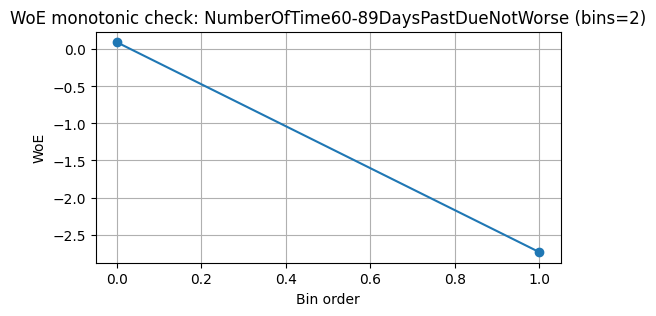

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


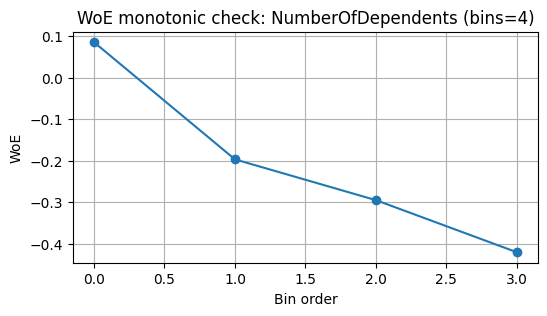

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


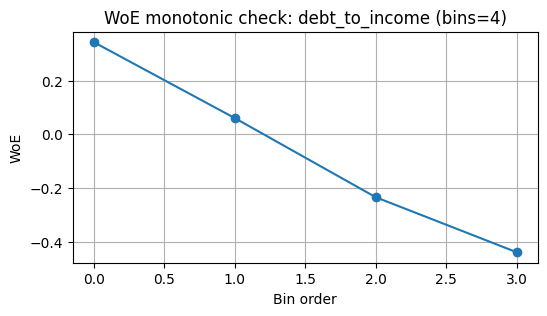

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


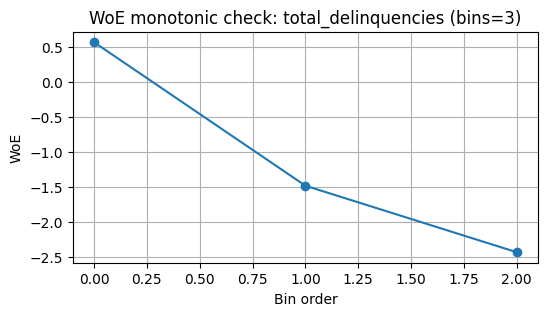

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


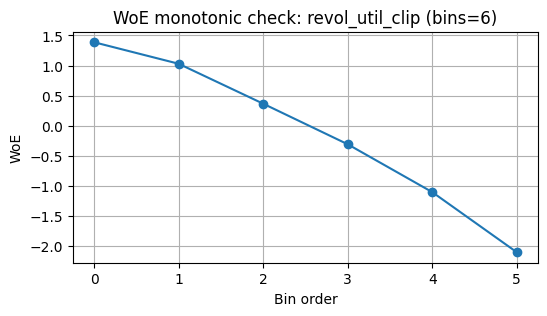

/tmp/ipython-input-1485780953.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x


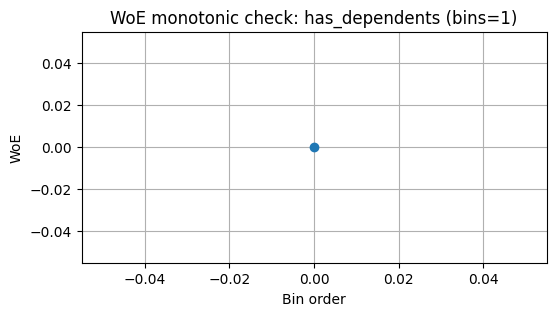

/tmp/ipython-input-1485780953.py:118: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = x.astype("object").fillna("MISSING")
/tmp/ipython-input-1485780953.py:118: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = x.astype("object").fillna("MISSING")


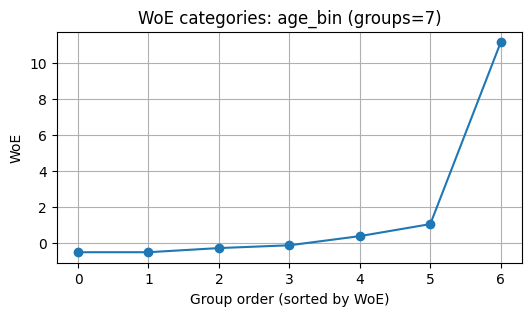

WoE features: 15


In [26]:
EPS = 1e-6

def _woe_table(x: pd.Series, y: pd.Series, bins):
    b = pd.cut(x, bins=bins, include_lowest=True) if not pd.api.types.is_categorical_dtype(x) else x
    df = pd.DataFrame({"bin": b, "y": y}).dropna(subset=["bin"])
    g = df.groupby("bin", observed=True)["y"].agg(["count", "sum"])
    g = g.rename(columns={"sum": "bad"})
    g["good"] = g["count"] - g["bad"]

    total_bad = g["bad"].sum()
    total_good = g["good"].sum()

    g["bad_rate"] = (g["bad"] + EPS) / (total_bad + EPS * len(g))
    g["good_rate"] = (g["good"] + EPS) / (total_good + EPS * len(g))
    g["woe"] = np.log(g["good_rate"] / g["bad_rate"])
    return g.reset_index()

def _merge_adjacent_bins(tbl: pd.DataFrame, idx_to_merge: int):
    left = tbl.iloc[idx_to_merge].copy()
    right = tbl.iloc[idx_to_merge + 1].copy()

    new_bin = (left["bin"].left, right["bin"].right) if hasattr(left["bin"], "left") else f"{left['bin']}+{right['bin']}"
    new_count = left["count"] + right["count"]
    new_bad = left["bad"] + right["bad"]
    new_good = left["good"] + right["good"]

    out = tbl.drop(tbl.index[[idx_to_merge, idx_to_merge + 1]]).reset_index(drop=True)
    new_row = pd.DataFrame([{
        "bin": pd.Interval(new_bin[0], new_bin[1], closed="right") if isinstance(new_bin, tuple) else new_bin,
        "count": new_count,
        "bad": new_bad,
        "good": new_good
    }])

    out = pd.concat([out.iloc[:idx_to_merge], new_row, out.iloc[idx_to_merge:]], ignore_index=True)

    total_bad = out["bad"].sum()
    total_good = out["good"].sum()
    out["bad_rate"] = (out["bad"] + EPS) / (total_bad + EPS * len(out))
    out["good_rate"] = (out["good"] + EPS) / (total_good + EPS * len(out))
    out["woe"] = np.log(out["good_rate"] / out["bad_rate"])
    return out

def monotonic_coarse_binning_numeric(x: pd.Series, y: pd.Series, fine_bins=20, max_bins=10):
    qs = np.linspace(0, 1, fine_bins + 1)
    edges = np.unique(np.nanquantile(x, qs))
    if len(edges) < 3:
        edges = np.unique(np.nanpercentile(x.dropna(), [0, 50, 100]))
    tbl = _woe_table(x, y, bins=edges)

    tbl = tbl.sort_values("bin").reset_index(drop=True)

    def is_monotonic(arr):
        if len(arr) <= 2:
            return True
        inc = np.all(np.diff(arr) >= -1e-12)
        dec = np.all(np.diff(arr) <=  1e-12)
        return inc or dec

    while (len(tbl) > max_bins) or (not is_monotonic(tbl["woe"].values)):
        deltas = np.abs(np.diff(tbl["woe"].values))
        j = int(np.argmin(deltas))
        tbl = _merge_adjacent_bins(tbl, j)

        if len(tbl) <= 2:
            break

    return tbl

def woe_transform_numeric(x: pd.Series, bin_table: pd.DataFrame):
    intervals = bin_table["bin"].tolist()
    woe_vals = bin_table["woe"].tolist()

    def lookup(v):
        if pd.isna(v):
            return np.nan
        for inter, w in zip(intervals, woe_vals):
            if hasattr(inter, "left") and v > inter.left and v <= inter.right:
                return w
            if hasattr(inter, "left") and v == inter.left and inter.closed_left:
                return w
        if hasattr(intervals[0], "left"):
            if v <= intervals[0].right:
                return woe_vals[0]
            return woe_vals[-1]
        return np.nan

    return x.apply(lookup)

def woe_binning_categorical(x: pd.Series, y: pd.Series, min_count=100):
    s = x.astype("object").fillna("MISSING")
    tbl = pd.DataFrame({"cat": s, "y": y}).groupby("cat")["y"].agg(["count", "sum"]).reset_index()
    tbl = tbl.rename(columns={"sum": "bad"})
    tbl["good"] = tbl["count"] - tbl["bad"]

    total_bad = tbl["bad"].sum()
    total_good = tbl["good"].sum()
    tbl["bad_rate"] = (tbl["bad"] + EPS) / (total_bad + EPS * len(tbl))
    tbl["good_rate"] = (tbl["good"] + EPS) / (total_good + EPS * len(tbl))
    tbl["woe"] = np.log(tbl["good_rate"] / tbl["bad_rate"])

    rare = tbl.loc[tbl["count"] < min_count, "cat"].tolist()
    s2 = s.where(~s.isin(rare), "OTHER")
    tbl2 = pd.DataFrame({"cat": s2, "y": y}).groupby("cat")["y"].agg(["count", "sum"]).reset_index()
    tbl2 = tbl2.rename(columns={"sum": "bad"})
    tbl2["good"] = tbl2["count"] - tbl2["bad"]

    total_bad = tbl2["bad"].sum()
    total_good = tbl2["good"].sum()
    tbl2["bad_rate"] = (tbl2["bad"] + EPS) / (total_bad + EPS * len(tbl2))
    tbl2["good_rate"] = (tbl2["good"] + EPS) / (total_good + EPS * len(tbl2))
    tbl2["woe"] = np.log(tbl2["good_rate"] / tbl2["bad_rate"])

    tbl2 = tbl2.sort_values("woe").reset_index(drop=True)
    return tbl2, rare

def woe_transform_categorical(x: pd.Series, tbl2: pd.DataFrame, rare_list):
    s = x.astype("object").fillna("MISSING")
    s = s.where(~s.isin(rare_list), "OTHER")
    mp = dict(zip(tbl2["cat"], tbl2["woe"]))
    return s.map(mp)



y_tr = y_train.copy()
X_tr = X_train.copy()
X_va = X_valid.copy()

woe_bins = {}
woe_features = []

cat_cols = [c for c in X_tr.columns if str(X_tr[c].dtype) == "category" or X_tr[c].dtype == "object"]

for c in X_tr.columns:
    if "interval" in str(X_tr[c].dtype).lower():
        cat_cols.append(c)
cat_cols = sorted(set(cat_cols))

num_cols = [c for c in X_tr.columns if c not in cat_cols]

X_tr_woe = pd.DataFrame(index=X_tr.index)
X_va_woe = pd.DataFrame(index=X_va.index)
df_test_fe_woe = pd.DataFrame(index=df_test_fe.index)

for c in num_cols:
    if c == "Unnamed: 0":
        continue
    try:
        bt = monotonic_coarse_binning_numeric(X_tr[c].astype(float), y_tr, fine_bins=20, max_bins=10)
        woe_bins[c] = bt
        X_tr_woe[c + "_woe"] = woe_transform_numeric(X_tr[c].astype(float), bt)
        X_va_woe[c + "_woe"] = woe_transform_numeric(X_va[c].astype(float), bt)
        df_test_fe_woe[c + "_woe"] = woe_transform_numeric(df_test_fe[c].astype(float), bt)
        woe_features.append(c + "_woe")

        plt.figure(figsize=(6, 3))
        plt.plot(range(len(bt)), bt["woe"].values, marker="o")
        plt.title(f"WoE monotonic check: {c} (bins={len(bt)})")
        plt.xlabel("Bin order")
        plt.ylabel("WoE")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Skip numeric {c} due to: {e}")

for c in cat_cols:
    try:
        tbl2, rare = woe_binning_categorical(X_tr[c], y_tr, min_count=100)
        woe_bins[c] = (tbl2, rare)
        X_tr_woe[c + "_woe"] = woe_transform_categorical(X_tr[c], tbl2, rare)
        X_va_woe[c + "_woe"] = woe_transform_categorical(X_va[c], tbl2, rare)
        df_test_fe_woe[c + "_woe"] = woe_transform_categorical(df_test_fe[c], tbl2, rare)
        woe_features.append(c + "_woe")

        plt.figure(figsize=(6, 3))
        plt.plot(range(len(tbl2)), tbl2["woe"].values, marker="o")
        plt.title(f"WoE categories: {c} (groups={len(tbl2)})")
        plt.xlabel("Group order (sorted by WoE)")
        plt.ylabel("WoE")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Skip categorical {c} due to: {e}")

print("WoE features:", len(woe_features))
X_tr_woe = X_tr_woe[woe_features]
X_va_woe = X_va_woe[woe_features]
df_test_fe_woe = df_test_fe_woe[woe_features]


Constructing and evaluating logistic regression - maximum 1 point
- Constructing only logistic regression - 0.3 points
- Evaluating the model (roc auc, f1, etc.) - 0.3 points
- Constructing a scorecard - 0.4 points

As a reminder, the following formulas are required for the scorecard (details in the lecture and seminar):
Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n, где

- Factor = pdo/ln(2)

- Offset = Target Score — (Factor × ln(Target Odds))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, classification_report

lr = LogisticRegression(max_iter=2000, solver="liblinear")
lr.fit(X_tr_woe.fillna(0), y_tr)

p_valid = lr.predict_proba(X_va_woe.fillna(0))[:, 1]
pred_valid = (p_valid >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_valid, p_valid))
print("F1:", f1_score(y_valid, pred_valid))
print(classification_report(y_valid, pred_valid))

pdo = 50
target_score = 600
target_odds = 20

Factor = pdo / np.log(2)
Offset = target_score - Factor * np.log(target_odds)

alpha = float(lr.intercept_[0])
betas = pd.Series(lr.coef_[0], index=X_tr_woe.columns)
n = len(betas)

print("Factor:", Factor, "Offset:", Offset, "alpha:", alpha, "n_features:", n)

scorecard_rows = []

for feat_woe, beta in betas.items():
    base_feat = feat_woe.replace("_woe", "")
    if base_feat in woe_bins and isinstance(woe_bins[base_feat], pd.DataFrame):
        bt = woe_bins[base_feat].copy()
        bt["feature"] = base_feat
        bt["beta"] = beta
        bt["points"] = (beta * bt["woe"] + alpha / n) * Factor + Offset / n
        bt = bt[["feature", "bin", "count", "bad", "good", "woe", "points"]]
        scorecard_rows.append(bt)

    elif base_feat in woe_bins and isinstance(woe_bins[base_feat], tuple):
        tbl2, _ = woe_bins[base_feat]
        t = tbl2.copy()
        t["feature"] = base_feat
        t["bin"] = t["cat"]
        t["points"] = (beta * t["woe"] + alpha / n) * Factor + Offset / n
        t = t.rename(columns={"count":"count", "bad":"bad", "good":"good"})
        t = t[["feature", "bin", "count", "bad", "good", "woe", "points"]]
        scorecard_rows.append(t)

scorecard = pd.concat(scorecard_rows, ignore_index=True)
scorecard.head(10)


ROC-AUC: 0.8444258270064402
F1: 0.29374813042177683
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34994
           1       0.59      0.20      0.29      2506

    accuracy                           0.94     37500
   macro avg       0.77      0.59      0.63     37500
weighted avg       0.92      0.94      0.92     37500

Factor: 72.13475204444818 Offset: 383.9035952556319 alpha: -2.6177322447605826 n_features: 15


,feature,bin,count,bad,good,woe,points
0,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0603]",39375,692,38683,1.387366,-12.988480
1,RevolvingUtilizationOfUnsecuredLines,"(0.0603, 0.205]",22500,561,21939,1.030097,-6.294750
2,RevolvingUtilizationOfUnsecuredLines,"(0.205, 0.445]",16875,798,16077,0.366833,6.132035
3,RevolvingUtilizationOfUnsecuredLines,"(0.445, 0.697]",11250,998,10252,-0.306729,18.751756
4,RevolvingUtilizationOfUnsecuredLines,"(0.697, 1.0]",19985,3543,16442,-1.101339,33.639410
5,RevolvingUtilizationOfUnsecuredLines,"(1.0, 50708.0]",2515,928,1587,-2.099635,52.343298
6,age,"(-0.001, 33.0]",12821,1420,11401,-0.553160,26.728225
7,age,"(33.0, 41.0]",15902,1486,14416,-0.363953,22.034217
8,age,"(41.0, 52.0]",29352,2355,26997,-0.197019,17.892761
9,age,"(52.0, 54.0]",5408,382,5026,-0.059245,14.474736


Conduct a sample stability analysis using PSI
- Compare the test and training samples you downloaded from Kaggle (df_train, df_test)

In [24]:
def psi(expected: pd.Series, actual: pd.Series, buckets=10):
    expected = expected.replace([np.inf, -np.inf], np.nan).dropna()
    actual = actual.replace([np.inf, -np.inf], np.nan).dropna()
    if expected.nunique() < 2 or actual.nunique() < 2:
        return 0.0

    qs = np.linspace(0, 1, buckets + 1)
    cuts = np.unique(np.quantile(expected, qs))
    if len(cuts) < 3:
        return 0.0

    e_bins = pd.cut(expected, cuts, include_lowest=True)
    a_bins = pd.cut(actual, cuts, include_lowest=True)

    e_perc = e_bins.value_counts(normalize=True, sort=False).values + EPS
    a_perc = a_bins.value_counts(normalize=True, sort=False).values + EPS

    return float(np.sum((e_perc - a_perc) * np.log(e_perc / a_perc)))

psi_rows = []
for c in woe_features:
    psi_val = psi(X_tr_woe[c], df_test_fe_woe[c], buckets=10)
    psi_rows.append((c, psi_val))

psi_df = pd.DataFrame(psi_rows, columns=["feature", "psi"]).sort_values("psi", ascending=False)
psi_df.head(15)


,feature,psi
2,age_woe,1.457307e-04
15,age_bin_woe,1.317323e-04
10,NumberOfDependents_woe,9.835859e-05
13,revol_util_clip_woe,8.866268e-05
1,RevolvingUtilizationOfUnsecuredLines_woe,8.512421e-05
6,NumberOfOpenCreditLinesAndLoans_woe,4.730889e-06
11,debt_to_income_woe,4.670590e-06
4,DebtRatio_woe,8.164498e-08
7,NumberOfTimes90DaysLate_woe,0.000000e+00
5,MonthlyIncome_woe,0.000000e+00


# 4. Using methods to reduce class imbalance - (Task weight: 20%)
- Try several methods to reduce class imbalance
- Choose the one that brings the greatest improvement

In [31]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

results = []
X_tr_woe = X_tr_woe.fillna(0)
X_va_woe = X_va_woe.fillna(0)

def eval_model(name, Xtr, ytr, Xte, yte):
    model = LogisticRegression(max_iter=2000, solver="liblinear")
    model.fit(Xtr, ytr)
    p = model.predict_proba(Xte)[:, 1]
    return {
        "method": name,
        "roc_auc": roc_auc_score(yte, p),
        "f1": f1_score(yte, (p >= 0.5).astype(int)),
        "model": model
    }

results.append(eval_model("baseline", X_tr_woe, y_tr, X_va_woe, y_valid))

model = LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced")
model.fit(X_tr_woe, y_tr)
p = model.predict_proba(X_va_woe)[:, 1]
results.append({
    "method": "class_weight=balanced",
    "roc_auc": roc_auc_score(y_valid, p),
    "f1": f1_score(y_valid, (p >= 0.5).astype(int)),
    "model": model
})

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_tr_woe, y_tr)
results.append(eval_model("undersampling", X_rus, y_rus, X_va_woe, y_valid))

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_tr_woe, y_tr)
results.append(eval_model("oversampling", X_ros, y_ros, X_va_woe, y_valid))

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_tr_woe, y_tr)
results.append(eval_model("smote", X_sm, y_sm, X_va_woe, y_valid))

summary = pd.DataFrame(results).drop(columns=["model"]).sort_values(
    ["f1", "roc_auc"], ascending=False
)
display(summary)

best = max(results, key=lambda x: (x["f1"], x["roc_auc"]))
print("Best method:", best["method"])


,method,roc_auc,f1
1,class_weight=balanced,0.844319,0.317713
3,oversampling,0.844245,0.316118
4,smote,0.843975,0.316109
2,undersampling,0.844496,0.315807
0,baseline,0.844426,0.293748


Best method: class_weight=balanced


_Optional, for those who have reached the end of the laptop_ 😊

What was your impression of the work?
What was difficult?
What was interesting?